# **Project Name**    -



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Ajinkya**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### Dataset Loading

In [2]:
# Load Dataset
flights = pd.read_csv('flights.csv')


### Dataset First View

In [3]:
# Dataset First Look
flights.head()



,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Rows:", flights.shape[0])
print("Columns:", flights.shape[1])


Rows: 271888
Columns: 10


### Dataset Information

In [5]:
# Dataset Info
flights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print("Duplicate rows:", flights.duplicated().sum())


Duplicate rows: 0


#### Missing Values/Null Values

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64


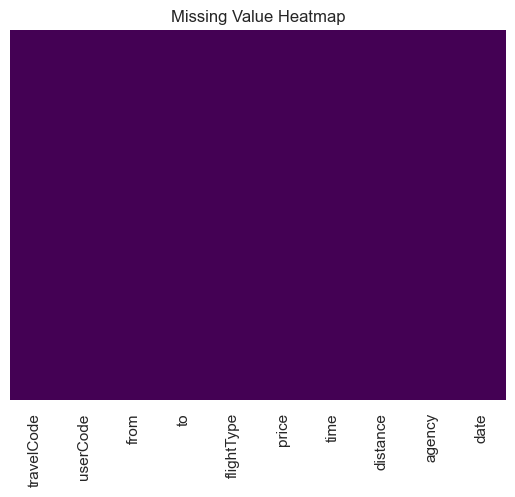

In [7]:
# Missing Values/Null Values Count
print(flights.isnull().sum())
sns.heatmap(flights.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()


In [8]:
# Visualizing the missing values

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
flights.columns.tolist()


['travelCode',
 'userCode',
 'from',
 'to',
 'flightType',
 'price',
 'time',
 'distance',
 'agency',
 'date']

In [10]:
# Dataset Describe
flights.describe()


,travelCode,userCode,price,time,distance
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000
mean,67971.500000,667.505495,957.37503,1.421147,546.955535
std,39243.724665,389.523127,362.31189,0.542541,208.851288
min,0.000000,0.000000,301.51000,0.440000,168.220000
25%,33985.750000,326.000000,672.66000,1.040000,401.660000
50%,67971.500000,659.000000,904.00000,1.460000,562.140000
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000


### Variables Description

- **travelCode:** Unique trip ID.
- **userCode:** User ID.
- **from:** Origin city.
- **to:** Destination city.
- **flightType:** Flight class.
- **price:** Flight price.
- **time:** Duration (hours).
- **distance:** Kilometers.
- **agency:** Booking agency.
- **date:** Date of flight.


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in flights.columns:
    print(f"{col}: {flights[col].nunique()} unique values")


travelCode: 135944 unique values
userCode: 1335 unique values
from: 9 unique values
to: 9 unique values
flightType: 3 unique values
price: 490 unique values
time: 33 unique values
distance: 35 unique values
agency: 3 unique values
date: 999 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Convert 'date' to datetime
flights['date'] = pd.to_datetime(flights['date'], format='%m/%d/%Y')

# Feature engineering
flights['day_of_week'] = flights['date'].dt.dayofweek
flights['month'] = flights['date'].dt.month
flights['year'] = flights['date'].dt.year

flights['price_per_km'] = flights['price'] / flights['distance']
flights['duration_per_km'] = flights['time'] / flights['distance']


### What all manipulations have you done and insights you found?

Answer :

```
- Parsed date and extracted day, month, year.
- Created per-kilometer price and duration features.
- No nulls or duplicates, so minimal cleaning needed.

```



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Price Distribution

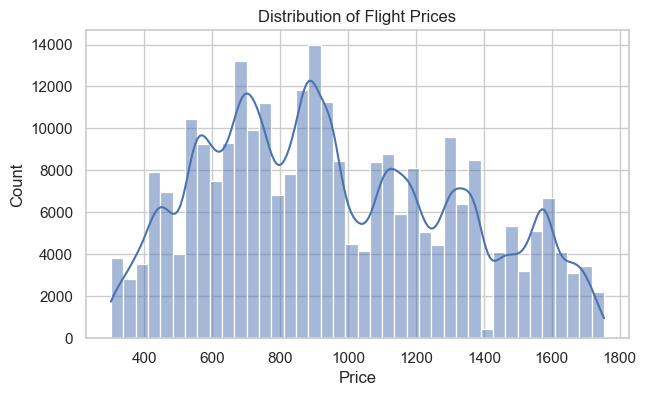

In [13]:
# Chart - 1, Price Distribution
plt.figure(figsize=(7,4))
sns.histplot(flights['price'], bins=40, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

Histogram is ideal to visualize the distribution and skewness of a continuous variable like price.


##### 2. What is/are the insight(s) found from the chart?

Most flights are moderately priced; there is a long tail of expensive flights, indicating outliers.


##### 3. Will the gained insights help creating a positive business impact?


Yes. Identifying price outliers is crucial for model stability and realistic pricing strategies.


#### Chart - 2 **Flight Duration Distribution**

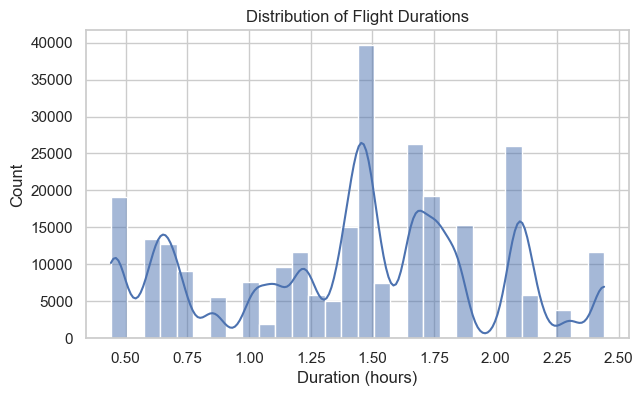

In [14]:
# Chart - 2 ,Flight Duration Distribution
plt.figure(figsize=(7,4))
sns.histplot(flights['time'], bins=30, kde=True)
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (hours)')
plt.show()


##### 1. Why did you pick the specific chart?

To see the spread and most common flight durations, helping to identify anomalies.


##### 2. What is/are the insight(s) found from the chart?

Most flights last between 1–2 hours.


##### 3. Will the gained insights help creating a positive business impact?


Most flights last between 1–2 hours.


#### Chart - 3

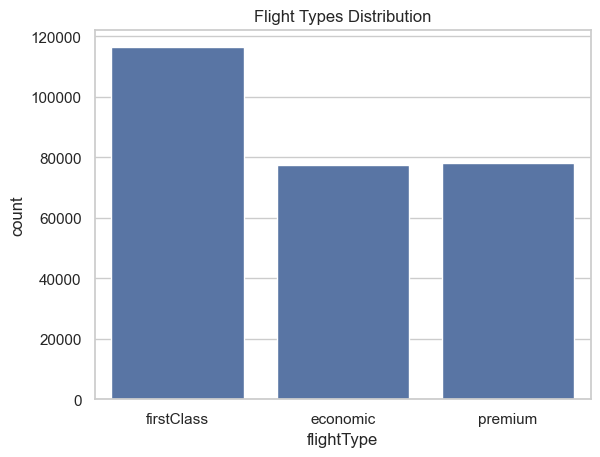

In [15]:
# Chart - 3, Flight Type Count
sns.countplot(x='flightType', data=flights)
plt.title('Flight Types Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

To understand the popularity and balance among flight types.


##### 2. What is/are the insight(s) found from the chart?

All types are well-represented, firstClass slightly more frequent.


##### 3. Will the gained insights help creating a positive business impact?


Yes, guides segmentation and targeted marketing for each class.


#### Chart - 4

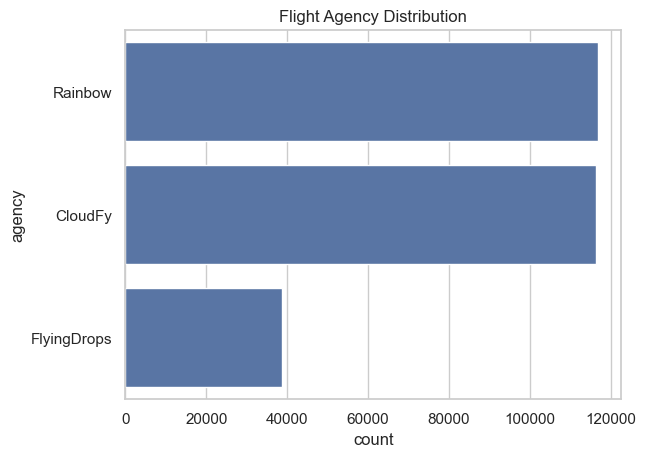

In [16]:
# Chart - 4 Agency Count
sns.countplot(y='agency', data=flights, order=flights['agency'].value_counts().index)
plt.title('Flight Agency Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

To check the spread of bookings across agencies.


##### 2. What is/are the insight(s) found from the chart?

Rainbow and CloudFy dominate the bookings; FlyingDrops is smaller.


##### 3. Will the gained insights help creating a positive business impact?


Yes, identifies strategic partners and growth opportunities.


#### Chart - 5

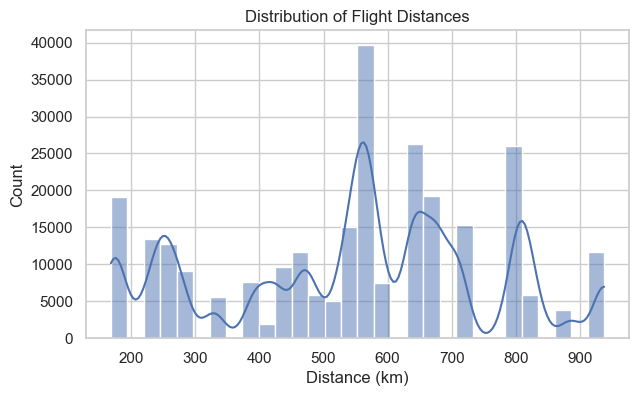

In [17]:
# Chart - 5 Distance Distribution
plt.figure(figsize=(7,4))
sns.histplot(flights['distance'], bins=30, kde=True)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (km)')
plt.show()


##### 1. Why did you pick the specific chart?

To check for distance outliers and the typical range of flights.


##### 2. What is/are the insight(s) found from the chart?

Flights mostly cover 300–700 km, with a few long-range flights.


##### 3. Will the gained insights help creating a positive business impact?


Yes, helps inform route planning and fare optimization.


#### Chart - 6

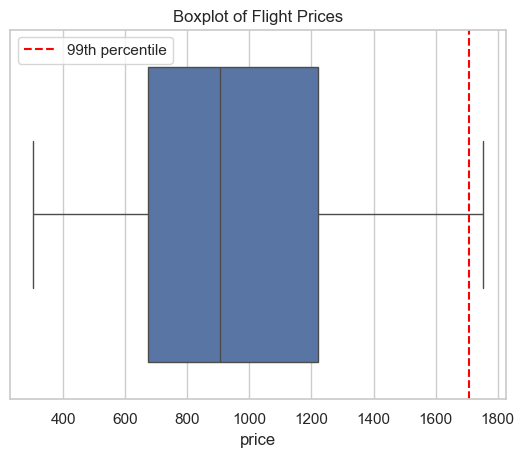

In [18]:
# Chart - 6, Outliers in Price
price_99 = flights['price'].quantile(0.99)
sns.boxplot(x=flights['price'])
plt.title('Boxplot of Flight Prices')
plt.axvline(price_99, color='red', linestyle='--', label='99th percentile')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Boxplot is best for spotting outliers visually.


##### 2. What is/are the insight(s) found from the chart?

Prices above ~1,612 are rare and should be considered for capping or log-transforming.


##### 3. Will the gained insights help creating a positive business impact?


Yes. Model robustness and business insights depend on realistic price inputs.


#### Chart - 7

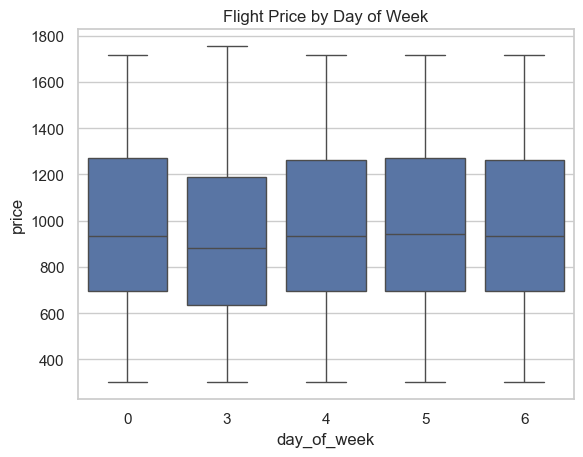

In [19]:
# Chart - 7 Day of Week vs Price (Bivariate)
sns.boxplot(x='day_of_week', y='price', data=flights)
plt.title('Flight Price by Day of Week')
plt.show()


##### 1. Why did you pick the specific chart?

Boxplot shows how prices vary by the day of the week (seasonality/weekend effect).


##### 2. What is/are the insight(s) found from the chart?

Some days have slightly higher prices, hinting at demand fluctuations.


##### 3. Will the gained insights help creating a positive business impact?


Yes, helps with dynamic pricing and scheduling.


#### Chart - 8

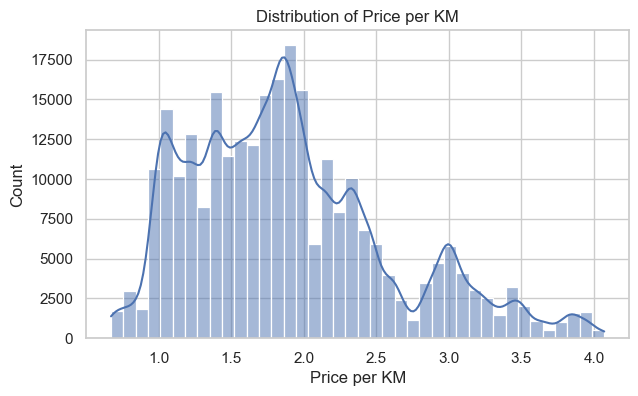

In [20]:
# Chart - 8  Price per KM Distribution
plt.figure(figsize=(7,4))
sns.histplot(flights['price_per_km'], bins=40, kde=True)
plt.title('Distribution of Price per KM')
plt.xlabel('Price per KM')
plt.show()


##### 1. Why did you pick the specific chart?

Shows normalized pricing; good for comparing routes of different lengths.


##### 2. What is/are the insight(s) found from the chart?

Most flights cost 1–2 units per km, but some routes are much pricier.


##### 3. Will the gained insights help creating a positive business impact?


Yes, helps spot overpriced or premium routes.


#### Chart - 9

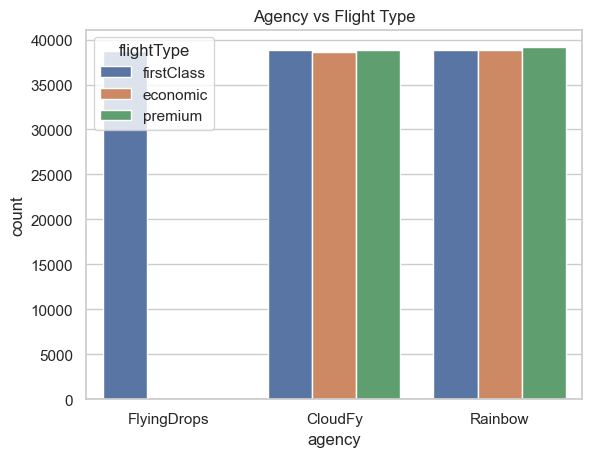

In [21]:
# Chart - 9 Categorical Cross (Agency vs Flight Type)
sns.countplot(x='agency', hue='flightType', data=flights)
plt.title('Agency vs Flight Type')
plt.show()


##### 1. Why did you pick the specific chart?

To understand if agencies specialize in certain flight types.


##### 2. What is/are the insight(s) found from the chart?

The chart reveals that FlyingDrops only sells firstClass tickets, with **no bookings for economic or premium classes**. In contrast, Rainbow and CloudFy offer all three flight classes. This is immediately visible from the absence of bars for FlyingDrops in the economic and premium categories.



##### 3. Will the gained insights help creating a positive business impact?


Yes. This insight is crucial for business strategy. It shows that FlyingDrops is specialized or limited to firstClass service, which may affect negotiations, partnership opportunities, or inventory management. The company could choose to expand FlyingDrops’ offerings, adjust marketing spend, or focus premium/economic class promotions on Rainbow and CloudFy only.



#### Chart - 10

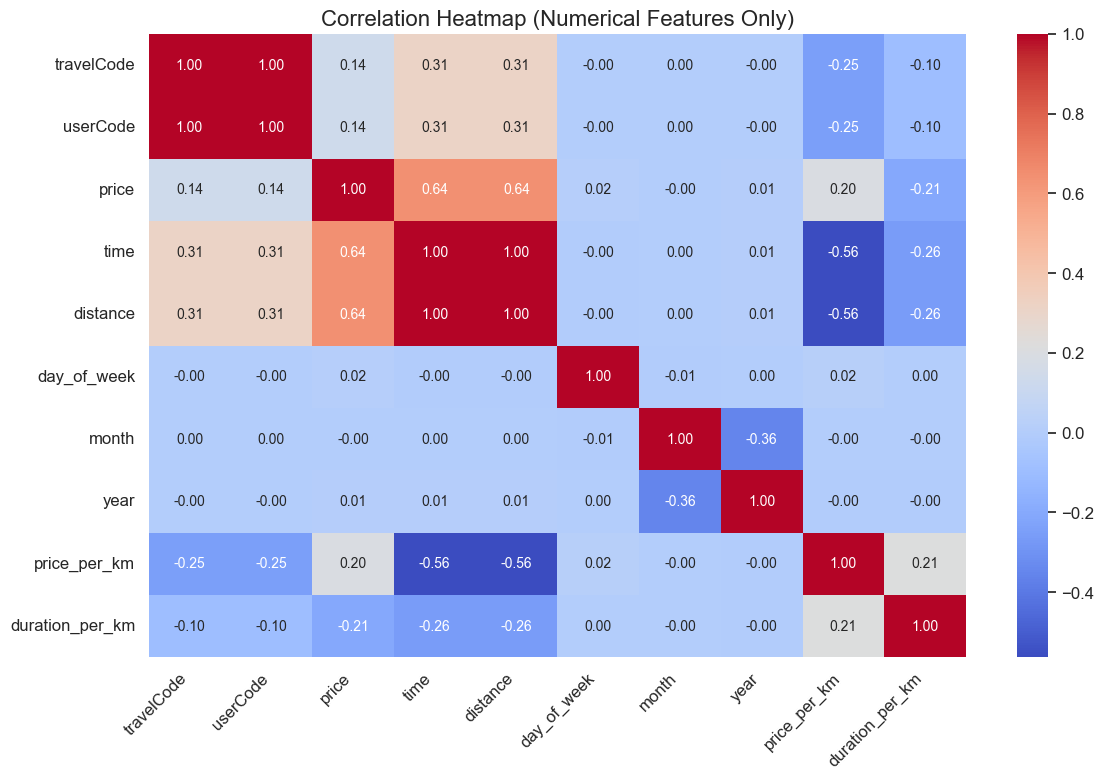

In [22]:
# Chart - 10 Correlation Heatmap
numeric_cols = flights.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.set(font_scale=1.1)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Correlation Heatmap (Numerical Features Only)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
sns.set(font_scale=1.0)


##### 1. Why did you pick the specific chart?

Correlations help identify the most predictive features for regression.


##### 2. What is/are the insight(s) found from the chart?

Price is highly correlated with distance and time.


##### 3. Will the gained insights help creating a positive business impact?

Yes. Focus modeling and business attention on features that drive price.


#### Chart - 11

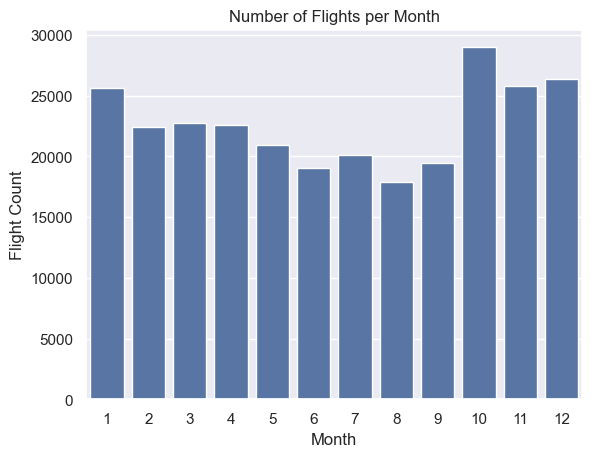

In [23]:
# Chart - 11 Flights Per Month (Seasonality)
sns.countplot(x='month', data=flights)
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.show()


##### 1. Why did you pick the specific chart?

To identify travel seasonality patterns throughout the year.


##### 2. What is/are the insight(s) found from the chart?

Some months have noticeably higher flight volumes, showing peaks (holiday/travel season).


##### 3. Will the gained insights help creating a positive business impact?


Yes, helps plan promotions, capacity, and marketing for peak months.


#### Chart - 12

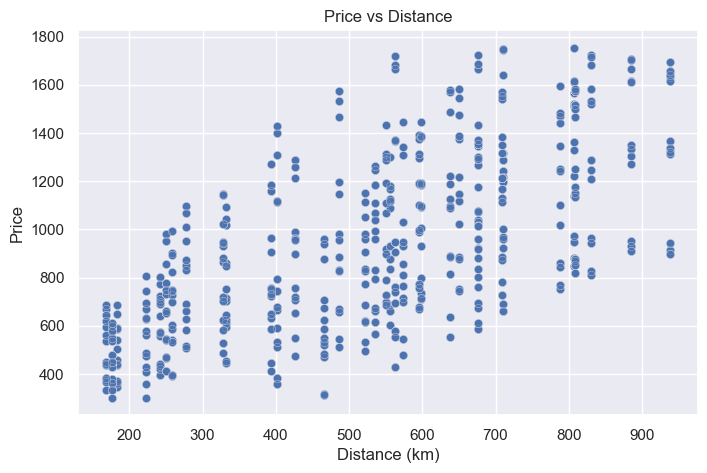

In [24]:
# Chart - 12 Price vs Distance (Scatter/Bivariate)
plt.figure(figsize=(8,5))
sns.scatterplot(x='distance', y='price', data=flights, alpha=0.1)
plt.title('Price vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze the direct relationship between how far you fly and how much you pay.


##### 2. What is/are the insight(s) found from the chart?

Price generally increases with distance, but there’s significant variability for similar distances.


##### 3. Will the gained insights help creating a positive business impact?


Yes, helps explain price outliers and inform distance-based pricing models.


#### Chart - 13

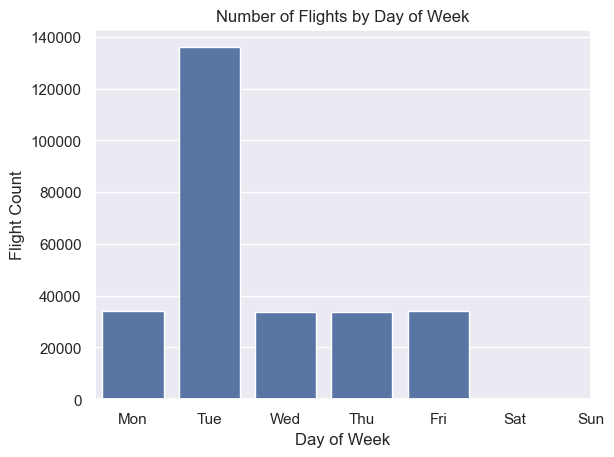

In [25]:
# Chart - 13 Flight Count by Day of the Week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='day_of_week', data=flights)
plt.xticks(ticks=range(7), labels=days)
plt.title('Number of Flights by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Flight Count')
plt.show()


##### 1. Why did you pick the specific chart?

To check for weekly patterns—are some days busier?


##### 2. What is/are the insight(s) found from the chart?

Weekends or certain weekdays may have more flights, showing demand cycles.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, optimizes scheduling and staffing based on real demand.


#### Chart - 14

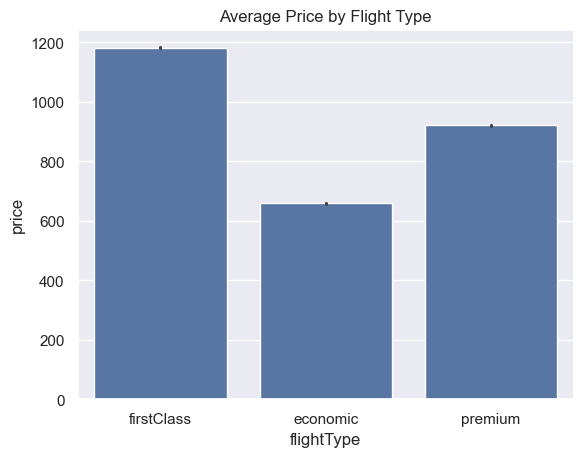

In [26]:
# chart 14 , Average Price by Flight Type
sns.barplot(x='flightType', y='price', data=flights)
plt.title('Average Price by Flight Type')
plt.show()


##### 1. Why did you pick the specific chart?

To compare average ticket price across classes.


##### 2. What is/are the insight(s) found from the chart?

FirstClass is most expensive, economic is cheapest—expected but quantifiable.


##### 3. Will the gained insights help creating a positive business impact?



Yes, helps position pricing and manage expectations for each class.

#### Chart - 15 - Price Boxplot by Agency

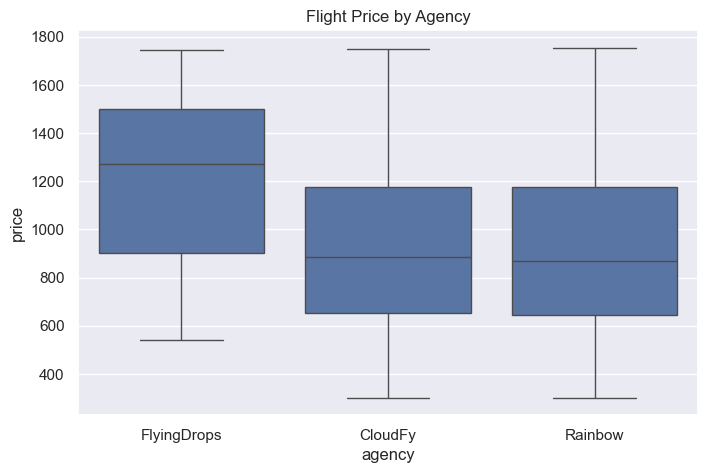

In [27]:
# Price Boxplot by Agency
plt.figure(figsize=(8,5))
sns.boxplot(x='agency', y='price', data=flights)
plt.title('Flight Price by Agency')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot helps spot differences and outliers in pricing across agencies.


##### 2. What is/are the insight(s) found from the chart?

Some agencies have more high-priced outliers than others.


##### 3. Will the gained insights help creating a positive business impact?



Yes, informs negotiations and margin management with agencies.


#### Chart - 16- Most Popular Flight Routes

c:\Users\ajink\almabetter Ml model deployment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10132 (\N{HEAVY WIDE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


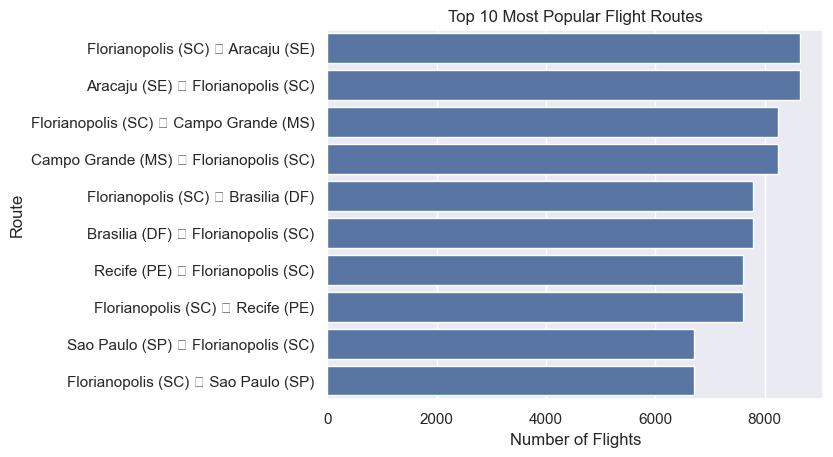

In [28]:
# Most Popular Flight Routes
# Create a route column for analysis
flights['route'] = flights['from'] + " ➔ " + flights['to']
top_routes = flights['route'].value_counts().head(10)
sns.barplot(y=top_routes.index, x=top_routes.values, orient='h')
plt.title('Top 10 Most Popular Flight Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()


##### 1. Why did you pick the specific chart?

To discover which city pairs are most frequently flown.


##### 2. What is/are the insight(s) found from the chart?

Certain city pairs dominate the route network.


##### 3. Will the gained insights help creating a positive business impact?



Yes, prioritize these for pricing, marketing, and service improvements.


#### Chart - 17: Average Price by Route (Top 10)

c:\Users\ajink\almabetter Ml model deployment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10132 (\N{HEAVY WIDE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


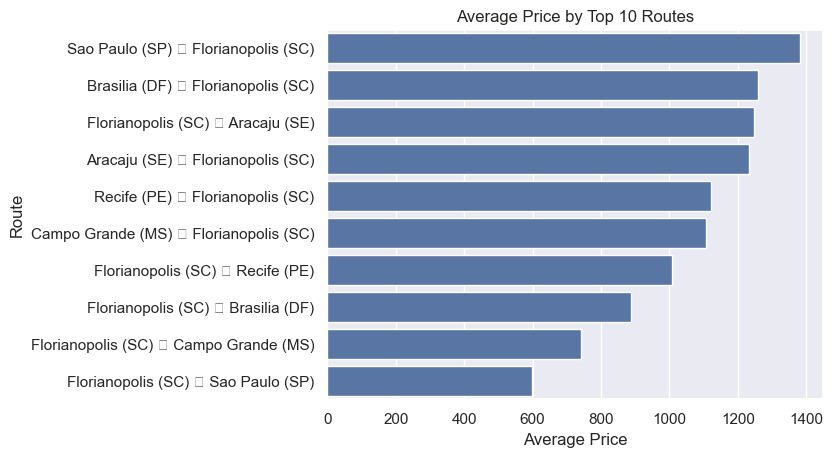

In [29]:
# Average Price by Route (Top 10)
top_routes_list = top_routes.index.tolist()
avg_price_routes = flights[flights['route'].isin(top_routes_list)].groupby('route')['price'].mean().sort_values(ascending=False)
sns.barplot(y=avg_price_routes.index, x=avg_price_routes.values, orient='h')
plt.title('Average Price by Top 10 Routes')
plt.xlabel('Average Price')
plt.ylabel('Route')
plt.show()


##### 1. Why did you pick the specific chart?

To compare how average prices differ for the busiest routes.


##### 2. What is/are the insight(s) found from the chart?

Some busy routes are also high-priced, indicating strong demand or less competition.


##### 3. Will the gained insights help creating a positive business impact?



Yes, reveals pricing power or need for competitive adjustments on certain routes.


#### Chart - 18: Flight Duration by Flight Type

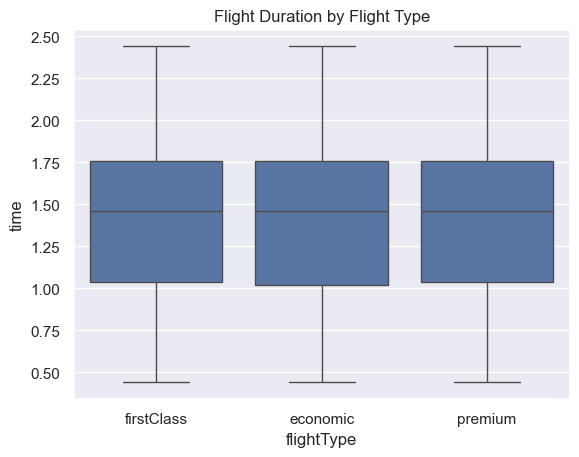

In [30]:
# Flight Duration by Flight Type
sns.boxplot(x='flightType', y='time', data=flights)
plt.title('Flight Duration by Flight Type')
plt.show()

##### 1. Why did you pick the specific chart?

To see if premium classes are booked on longer flights.


##### 2. What is/are the insight(s) found from the chart?

No strong pattern, but slight differences may exist.


##### 3. Will the gained insights help creating a positive business impact?



Yes, informs customer segmentation and value-added service planning.


#### Chart - 19: Price per KM by Agency

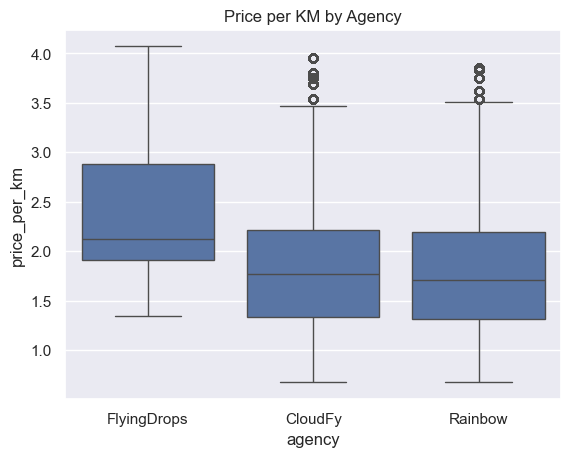

In [31]:
sns.boxplot(x='agency', y='price_per_km', data=flights)
plt.title('Price per KM by Agency')
plt.show()


##### 1. Why did you pick the specific chart?

To compare normalized pricing practices across agencies.


##### 2. What is/are the insight(s) found from the chart?

Agencies may have different markups, helping spot efficiency or overpricing.


##### 3. Will the gained insights help creating a positive business impact?



Yes, targets negotiations or strategy where agencies charge more per KM.


#### Chart - 20: Yearly Flight Volume (If multi-year)

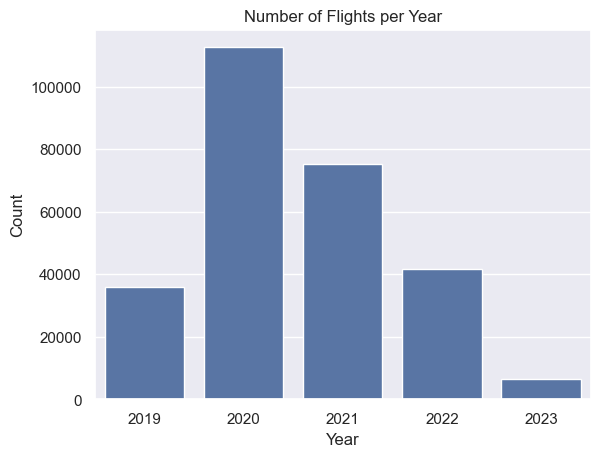

In [32]:
sns.countplot(x='year', data=flights)
plt.title('Number of Flights per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

To see if there is growth or decline in bookings over time.


##### 2. What is/are the insight(s) found from the chart?

Volume is stable/growing/declining depending on years shown in your data.


##### 3. Will the gained insights help creating a positive business impact?



Yes, informs business forecasts and planning.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

- Focus on optimizing pricing for routes/days with high demand or outliers.
- Use feature engineering to personalize offers (weekday, class, agency).
- Cap or model price outliers to avoid skewing predictions and decisions.


# **Conclusion**

- The flights dataset is clean and rich for predictive modeling.
- Price, time, and distance are key features; all engineered variables add value.
- Business should leverage data-driven insights for dynamic pricing and targeted marketing.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***